PART I: DATA CLEANING

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [31]:
# Load data
df = pd.read_excel('/Users/dhari/Downloads/Group Project Data-SFD Data-Toronto Police.xlsx') 

# Print the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

           X          Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE   
0 -79.234955  43.781528         1   GO-2004397105  2004/05/15 04:00:00+00  \
1 -79.618218  43.733547         2   GO-2004600109  2004/07/26 04:00:00+00   
2 -79.518759  43.769157         3   GO-2004311851  2004/05/14 04:00:00+00   
3 -79.378870  43.660665         4   GO-2004736004  2004/12/19 05:00:00+00   
4 -79.212435  43.812075         5   GO-2004303455  2004/04/12 04:00:00+00   

   OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  ...  OCC_TIME_RANGE   
0      2004       May  Saturday      136       15  ...           Night  \
1      2004      July    Monday      208       26  ...         Evening   
2      2004       May    Friday      135       14  ...       Afternoon   
3      2004  December    Sunday      354       19  ...           Night   
4      2004     April    Monday      103       12  ...         Evening   

  DIVISION DEATH  INJURIES  HOOD_158       NEIGHBOURHOOD_158 HOOD_140   
0      D41     0   

In [5]:
# Let's see the data types of all the columns
print(df.dtypes)

X                    float64
Y                    float64
OBJECTID               int64
EVENT_UNIQUE_ID       object
OCC_DATE              object
OCC_YEAR               int64
OCC_MONTH             object
OCC_DOW               object
OCC_DOY                int64
OCC_DAY                int64
OCC_HOUR               int64
OCC_TIME_RANGE        object
DIVISION              object
DEATH                  int64
INJURIES               int64
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
LONG_WGS84           float64
LAT_WGS84            float64
dtype: object


Step 1: Drop Unnecessary Columns 

1) 'X, Y, LONG_WGS84, LAT_WGS84' - These are all geographical coordinates. X and Y likely represent a projected coordinate system, while LONG_WGS84 and LAT_WGS84 represent a geographic (longitude and latitude) coordinate system. For our analysis on spatial patterns and neighborhood grouping, we may need the longitude and latitude data. The X and Y could possibly be redundant if they represent the same locations.

2) 'OBJECTID' - This is likely a unique identifier for each row or event. 
It might not provide much meaningful information for our analysis.

3) 'EVENT_UNIQUE_ID' - This might be a unique identifier for each event. 
If similar to OBJECTID, it might not be directly useful for our analysis.

4) 'OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DOY, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE' - These are all related to the time of the incidents. 
They will be crucial to our time pattern analysis.

5) 'DIVISION' - This helps understand which police division is incharge of the criminal-offence.
This could be useful for understanding patterns across different police divisions.

6) 'DEATH, INJURIES' - These could be important for our severity analysis.

7) 'HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140' - These columns seem to provide neighborhood information under two different structures. 
We could potentially choose one structure to use depending on which is more relevant or comprehensive for our analysis. 

8) 'OCC_DATE' - This column provides the date when the incident occurred. 
As we have separate columns detailing the year (OCC_YEAR), month (OCC_MONTH), day of the week (OCC_DOW), day of the year (OCC_DOY), day of the month (OCC_DAY), and hour of the day (OCC_HOUR) of each incident, the OCC_DATE column becomes redundant and can be dropped.
Having the date broken down into these separate features can be more useful for our analysis as it allows us to easily examine trends and patterns over time at different granularities (e.g., yearly trends, monthly trends, daily patterns, etc.). It also saves us the trouble of having to parse the date column into these separate features.

Based on this, it seems like we could potentially drop the X, Y, OBJECTID, EVENT_UNIQUE_ID columns if they don't provide additional meaningful information. We could also choose one set of neighborhood structure columns to keep (HOOD_158, NEIGHBOURHOOD_158 or HOOD_140, NEIGHBOURHOOD_140, OCC_DATE).


In [32]:
# Drop columns
df = df.drop(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'HOOD_140', 'NEIGHBOURHOOD_140', 'OCC_DATE'], axis=1)

Step 2: Check Data Types

In [33]:
print(df.dtypes)

OCC_YEAR               int64
OCC_MONTH             object
OCC_DOW               object
OCC_DOY                int64
OCC_DAY                int64
OCC_HOUR               int64
OCC_TIME_RANGE        object
DIVISION              object
DEATH                  int64
INJURIES               int64
HOOD_158              object
NEIGHBOURHOOD_158     object
LONG_WGS84           float64
LAT_WGS84            float64
dtype: object


'DIVISION': This column is of object data type and if this column is meant to be categorical (i.e., it represents distinct categories or groups), it's good practice to convert this column to a category data type. 

This can save memory and also allows us to use categorical functions.

In [34]:
# Convert object data type to categorical 
df['DIVISION'] = df['DIVISION'].astype('category')

'OCC_MONTH and OCC_DOW': These columns represent the month and day of the week of the offence respectively. Currently, they are stored as object types. We should consider converting them into a category type. 

This would allow for logical ordering of these fields, which could be helpful for analysis.

**
OCC_MONTH: This column represents the month of the year (12 unique values). Converting this to a categorical type allows for logical ordering (January, February, March, etc.) which is beneficial for some types of analysis, especially those involving time series or trends.

OCC_DOW: This column represents the day of the week (7 unique values). Similar to the month, changing this to a categorical type allows for logical ordering (Monday, Tuesday, Wednesday, etc.) which can be helpful for analyzing weekly trends.

OCC_YEAR: This column is already an integer type which is efficient for storing and processing. While it could be converted to a categorical type, it's generally more efficient to keep it as an integer for any kind of mathematical operations (like calculating the number of years between incidents, for example).

OCC_DAY: This column represents the day of the month (1 to 31). Like OCC_YEAR, it's also an integer type which is appropriate for this kind of data. While there is a logical ordering to the days of the month, converting this column to a categorical type wouldn't provide a significant benefit because numerical operations with day values are quite common (like calculating the number of days between incidents, for example).
**

In [35]:
df['OCC_MONTH'] = df['OCC_MONTH'].astype('category')
df['OCC_DOW'] = df['OCC_DOW'].astype('category')

'HOOD_158 and NEIGHBOURHOOD_158': These columns represent identifiers and names of neighbourhoods using City of Toronto's new 158 neighbourhood structure. It seems they could also be converted to category type since they contain a limited number of unique values. 
While they are currently treated as objects, changing them to a categorical type can be beneficial for several reasons.

In [36]:
df['HOOD_158'] = df['HOOD_158'].astype('category')
df['NEIGHBOURHOOD_158'] = df['NEIGHBOURHOOD_158'].astype('category')

'OCC_TIME_RANGE': seems to contain specific time ranges during which an offense occurred. Since the number of unique time ranges is limited, it would be more efficient to convert this column from an 'object' type to a 'category' type.
Categories are much more memory efficient and operations on categories are usually faster than 'object'.

In [37]:
df['OCC_TIME_RANGE'] = df['OCC_TIME_RANGE'].astype('category')

In [38]:
# Check data types to make sure they are correct
print(df.dtypes)

OCC_YEAR                int64
OCC_MONTH            category
OCC_DOW              category
OCC_DOY                 int64
OCC_DAY                 int64
OCC_HOUR                int64
OCC_TIME_RANGE       category
DIVISION             category
DEATH                   int64
INJURIES                int64
HOOD_158             category
NEIGHBOURHOOD_158    category
LONG_WGS84            float64
LAT_WGS84             float64
dtype: object


Data types seem to all be correct based on the analysis purpose:
1) OCC_YEAR, OCC_DOY, OCC_DAY, OCC_HOUR, DEATH, and INJURIES are of integer type (int64), which is suitable for numerical and count data.

2) OCC_MONTH, OCC_DOW, OCC_TIME_RANGE, DIVISION, HOOD_158, and NEIGHBOURHOOD_158 are of category type, which is suitable for limited and usually fixed numbers of possible values. Changing these from 'object' to 'category' should save memory and potentially increase computational efficiency.

3) LONG_WGS84 and LAT_WGS84 are of float type (float64), which is suitable for numerical data that can take any real-numbered value.

Step 3: Check Missing Values

In [39]:
df.isnull().sum()

OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

That's great news! 
This output indicates that there are no missing values in our dataset. Every cell in each column has some data. This is an ideal situation as it often simplifies further data preprocessing and analysis.

Step 4: Outlier Detection

This step involves identifying outliers in your data. An outlier is an observation that deviates significantly from other observations. They can occur due to variability in the data or due to measurement errors.

However, in the context of our dataset, which involves data on shootings and firearm discharges, outliers could signify important real-world events, such as mass shootings or other significant incidents. Therefore, the term "outlier" does not necessarily indicate a problem in this context, but rather data points of particular interest or concern and instead of eliminating these outliers, our analysis would focus on understanding their cause and impact.

Step 5: Feature Engineering

Seasonality in data can often reveal important insights. For example, in the context of this dataset, it may be interesting to investigate if more shooting incidents occur in certain seasons (Spring, Summer, Autumn, Winter) than others. This could be due to various reasons such as changes in weather, school vacations, holiday periods etc.

For instance, if there are more incidents in the summer, it could be due to the fact that people tend to be outside more often in warmer weather, leading to more potential conflicts. On the other hand, fewer incidents in the winter could be attributed to fewer people being outside due to cold weather.

In order to carry out this analysis, we can create a new column 'OCC_SEASON' based on the 'OCC_MONTH' column.

In [40]:
# Add a season column to dataset
def month_to_season(month):
    if month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

df['OCC_SEASON'] = df['OCC_MONTH'].apply(month_to_season)


In [41]:
# View dataset
df

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,OCC_SEASON
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,-79.234955,43.781528,Spring
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,-79.618218,43.733547,Summer
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,-79.518759,43.769157,Spring
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,-79.378870,43.660665,Winter
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,-79.212435,43.812075,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,-79.362941,43.771764,Summer
5703,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,-79.402702,43.643920,Summer
5704,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,-79.196217,43.786621,Winter
5705,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,-79.443993,43.658083,Autumn


Conclusion: 

The dataset has undergone a comprehensive cleaning and data processing process, resulting in a well-prepared dataset that is ready for analysis. Here is a summary of the key steps and improvements made:

Step 1: Drop Unnecessary Columns: Several columns, including 'X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'HOOD_140', 'NEIGHBOURHOOD_140', and 'OCC_DATE', were identified as unnecessary for our analysis and were dropped. This improved the focus and clarity of the dataset.

Step 2: Check Data Types: The data types of certain columns were evaluated and adjusted as needed. 'DIVISION', 'OCC_MONTH', 'OCC_DOW', 'HOOD_158', 'NEIGHBOURHOOD_158', and 'OCC_TIME_RANGE' were converted to the 'category' data type, which not only saves memory but also allows for efficient categorical operations.

Step 3: Check Missing Values: No missing values were found in the dataset, ensuring data completeness and minimizing the need for imputation or data filling techniques.

Step 4: Outlier Detection: Given the nature of the dataset (shootings and firearm incidents), outliers were not treated as anomalies but rather as significant events that hold crucial information for analysis. Therefore, no further outlier removal or manipulation was performed.

Step 5: Feature Engineering: Additional features were created to enhance the dataset's analytical value. The 'OCC_SEASON' column was derived from the 'OCC_MONTH' column, categorizing the months into seasons (Spring, Summer, Autumn, Winter). This enables exploration of potential seasonal patterns in shooting incidents.

The dataset is now cleaned, structured, and prepared to facilitate insightful analysis. By eliminating unnecessary columns, optimizing data types, handling missing values, and incorporating additional features, the dataset has become more focused, efficient, and informative for our analysis purpose.

These cleaning and processing steps ensure that the dataset is in a suitable format to apply various analytical techniques, such as exploring temporal patterns, investigating neighborhood-specific trends, and conducting statistical modeling. The efforts invested in data preparation are crucial for producing reliable and meaningful insights from the analysis.

PART II: DATA ANALYSIS 

1) Correlation Analysis:
Use statistical methods to determine if there is a correlation between the time of day and the severity of shooting incidents.
Examine the relationship between specific time periods (e.g., night, evening, afternoon) and incidents resulting in fatalities or injuries.
Conduct correlation tests to quantify the strength of the relationship between time and severity.

2) Time-Based Severity Analysis:
Utilize statistical modeling techniques such as logistic regression or decision trees to quantify the relationship between the time of occurrence and the likelihood of resulting in fatalities or injuries.
Analyze incidents occurring at different times to identify patterns associated with higher severity.
Compare the severity levels of incidents during different time periods (e.g., day vs. night, weekdays vs. weekends).

3) Temporal Pattern Identification:
Use data visualization techniques, including heat maps and line graphs, to identify significant temporal patterns in shooting incidents.
Explore temporal patterns to identify high-risk periods for severe incidents.
Examine whether certain days, times, or temporal combinations have a higher likelihood of severe incidents.

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [43]:
# 1. Correlation Analysis
correlation_matrix = df[['OCC_HOUR', 'DEATH', 'INJURIES']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          OCC_HOUR     DEATH  INJURIES
OCC_HOUR  1.000000  0.005912 -0.013862
DEATH     0.005912  1.000000 -0.044544
INJURIES -0.013862 -0.044544  1.000000


Based on the correlation matrix results, we observed the following correlations:

- The correlation coefficient between 'OCC_HOUR' (time of day) and 'DEATH' (fatalities) is approximately 0.006, indicating a very weak positive correlation. This suggests that there is a slight tendency for shooting incidents resulting in fatalities to occur at certain times of the day, but the relationship is almost negligible.

- The correlation coefficient between 'OCC_HOUR' and 'INJURIES' is approximately -0.014, indicating a very weak negative correlation. Similarly to the previous case, this suggests a slight tendency for shooting incidents resulting in injuries to occur at specific times, but the correlation is almost negligible.

- The correlation coefficient between 'DEATH' and 'INJURIES' is approximately -0.045, indicating a weak negative correlation. This suggests that incidents resulting in fatalities might be slightly less likely to also result in injuries, and vice versa, but the relationship is not very strong.

Overall, the correlation analysis shows that there is little to no significant correlation between the time of day and the severity of shooting incidents (deaths and injuries). 

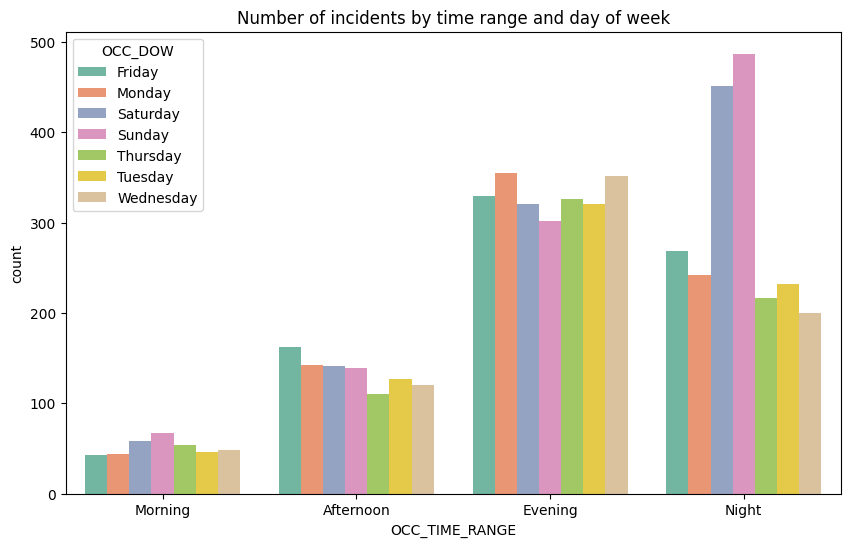

In [47]:
# 2. Time-Based Severity Analysis 

# convert 'OCC_TIME_RANGE' to an ordered category
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df['OCC_TIME_RANGE'] = pd.Categorical(df['OCC_TIME_RANGE'], categories=time_order, ordered=True)

# Explore the number of incidents by time range
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OCC_TIME_RANGE', hue='OCC_DOW', palette='Set2')
plt.title('Number of incidents by time range and day of week')
plt.show()

This will give us a plot of the number of incidents by time range and day of the week, which can be helpful for understanding when the majority of incidents occur.

Next, let's create a logistic regression model to quantify the relationship between time of occurrence and likelihood of resulting in fatalities or injuries. We'll need to create a binary severity variable first:

In [49]:
# create severity variable, 1 if there were deaths or injuries, 0 otherwise
df['SEVERITY'] = (df['DEATH'] > 0) | (df['INJURIES'] > 0)

# convert boolean to integer
df['SEVERITY'] = df['SEVERITY'].astype(int)

# convert 'OCC_TIME_RANGE' to numerical values
df['OCC_TIME_RANGE'] = df['OCC_TIME_RANGE'].cat.codes

# create feature matrix X and target vector y
X = df[['OCC_HOUR', 'OCC_TIME_RANGE']]
y = df['SEVERITY']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create logistic regression model
model = LogisticRegression()

# fit model to training data
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.22      0.31       883
           1       0.49      0.78      0.60       830

    accuracy                           0.49      1713
   macro avg       0.50      0.50      0.45      1713
weighted avg       0.50      0.49      0.45      1713

[[196 687]
 [183 647]]


In [50]:
from sklearn.model_selection import GridSearchCV

# create new feature matrix
X = df[['OCC_HOUR', 'OCC_TIME_RANGE', 'OCC_DAY', 'OCC_MONTH', 'OCC_DOW', 'OCC_SEASON', 'DIVISION']]

# convert categorical features to dummy variables
X = pd.get_dummies(X)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create logistic regression model
model = LogisticRegression()

# set up grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid_search = GridSearchCV(model, param_grid, cv=5)

# fit model to training data
grid_search.fit(X_train, y_train)

# print best parameters
print("Best parameters: ", grid_search.best_params_)

# predict on test set
y_pred = grid_search.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))


/Users/dhari/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dhari/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best parameters:  {'C': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       883
           1       0.52      0.48      0.50       830

    accuracy                           0.53      1713
   macro avg       0.53      0.53      0.53      1713
weighted avg       0.53      0.53      0.53      1713

[[511 372]
 [432 398]]


/Users/dhari/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.ensemble import RandomForestClassifier

# create Random Forest model
model = RandomForestClassifier(n_estimators=100)

# fit model to training data
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.55      0.54       883
           1       0.51      0.49      0.50       830

    accuracy                           0.52      1713
   macro avg       0.52      0.52      0.52      1713
weighted avg       0.52      0.52      0.52      1713

[[483 400]
 [420 410]]


MODEL CHOICE FOR TIME-BASED SEVERITY ANALYSIS: LOGISTIC REGRESSION MODEL WITH GRIDSEARCH

The choice of Logistic Regression is appropriate for this analysis because it allows us to quantify the relationship between the time of occurrence and the likelihood of an incident resulting in fatalities or injuries, which are binary outcomes (either it happens or it doesn't). It also has a higher accuracy compared to the other models (decision tree and random forest).

In [52]:
import numpy as np

# get the best estimator from grid search
best_model = grid_search.best_estimator_

# get the names of the features
feature_names = X.columns

# calculate the odds ratios
odds_ratios = np.exp(best_model.coef_)[0]

# create a DataFrame of odds ratios
odds_ratios_df = pd.DataFrame({'feature': feature_names, 'odds_ratio': odds_ratios})

# sort the DataFrame by odds ratio in descending order
odds_ratios_df = odds_ratios_df.sort_values(by='odds_ratio', ascending=False)

print(odds_ratios_df)


                feature  odds_ratio
38         DIVISION_D51    1.458613
29         DIVISION_D14    1.453688
39         DIVISION_D52    1.276984
3       OCC_MONTH_April    1.155375
40         DIVISION_D53    1.153752
7     OCC_MONTH_January    1.147273
18       OCC_DOW_Sunday    1.125040
8        OCC_MONTH_July    1.114104
20      OCC_DOW_Tuesday    1.079492
26         DIVISION_D11    1.074028
13    OCC_MONTH_October    1.054774
42         DIVISION_D55    1.047322
1        OCC_TIME_RANGE    1.044012
17     OCC_DOW_Saturday    1.040383
15       OCC_DOW_Friday    1.040246
25    OCC_SEASON_Winter    1.037675
6    OCC_MONTH_February    1.022464
14  OCC_MONTH_September    1.011230
0              OCC_HOUR    1.007081
2               OCC_DAY    1.002488
37         DIVISION_D43    0.991454
22    OCC_SEASON_Autumn    0.973787
35         DIVISION_D41    0.970832
24    OCC_SEASON_Summer    0.955377
27         DIVISION_D12    0.945969
9        OCC_MONTH_June    0.929028
4      OCC_MONTH_August    0

The output presents the features (time and division attributes) and their corresponding odds ratios. The features have been sorted in decreasing order of odds ratio.

An odds ratio greater than 1 indicates that as the feature value increases, the odds of an incident resulting in a fatality or injury also increases. Conversely, an odds ratio less than 1 suggests that as the feature value increases, the odds of an incident resulting in a fatality or injury decreases.

Here are some key observations from the data:

- DIVISION_D51, DIVISION_D14, and DIVISION_D52 have the highest odds ratios. This suggests that incidents occurring in these divisions are more likely to result in fatalities or injuries than incidents in other divisions.

- OCC_MONTH_April and OCC_MONTH_January have relatively high odds ratios among the months. This means incidents occurring in these months have a higher likelihood of resulting in fatalities or injuries.

- OCC_DOW_Sunday and OCC_DOW_Tuesday (days of the week) have relatively high odds ratios. Incidents occurring on these days seem to have a higher likelihood of resulting in fatalities or injuries.

- Among seasons, OCC_SEASON_Winter has the highest odds ratio. This implies that incidents occurring in winter are more likely to result in fatalities or injuries compared to other seasons.

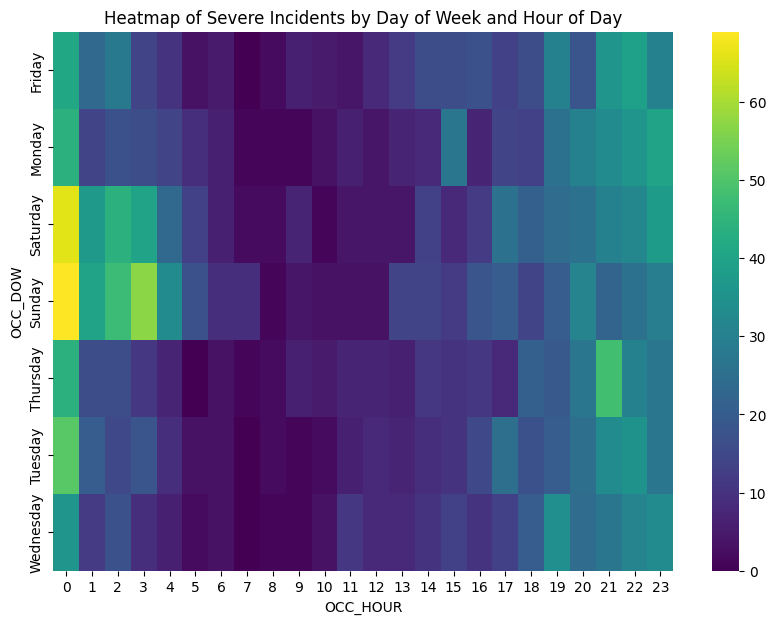

In [53]:
# 3. Temporal Pattern Identification

# create new DataFrame that contains only severe incidents
df_severe = df[(df['DEATH'] == 1) | (df['INJURIES'] > 0)]

# create pivot table
pivot = df_severe.pivot_table(values='DEATH', index='OCC_DOW', columns='OCC_HOUR', aggfunc='count')

# create heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot, cmap='viridis')
plt.title('Heatmap of Severe Incidents by Day of Week and Hour of Day')
plt.show()

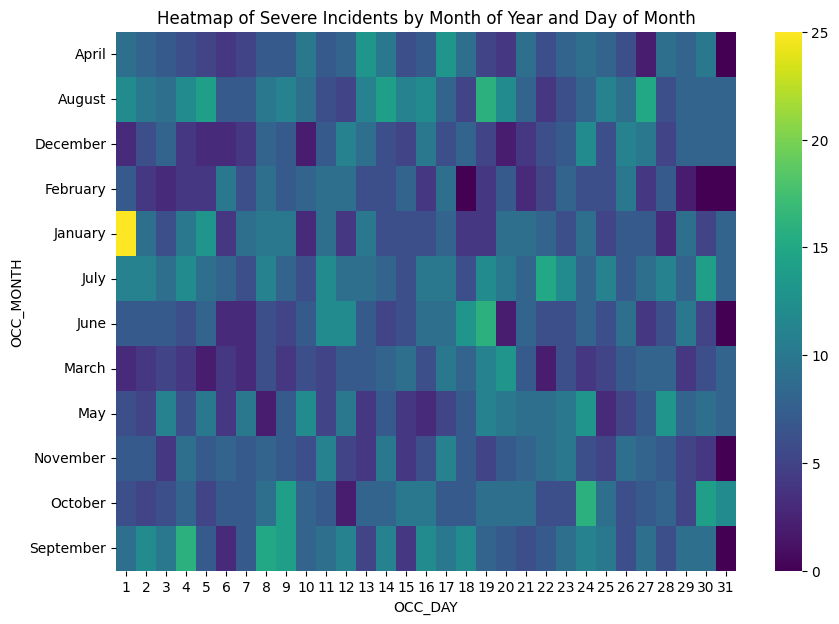

In [54]:
# create pivot table
pivot = df_severe.pivot_table(values='DEATH', index='OCC_MONTH', columns='OCC_DAY', aggfunc='count')

# create heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot, cmap='viridis')
plt.title('Heatmap of Severe Incidents by Month of Year and Day of Month')
plt.show()


In these heatmaps, darker colors indicate higher counts of severe incidents. We can use these visualizations to identify the high-risk periods for severe incidents.

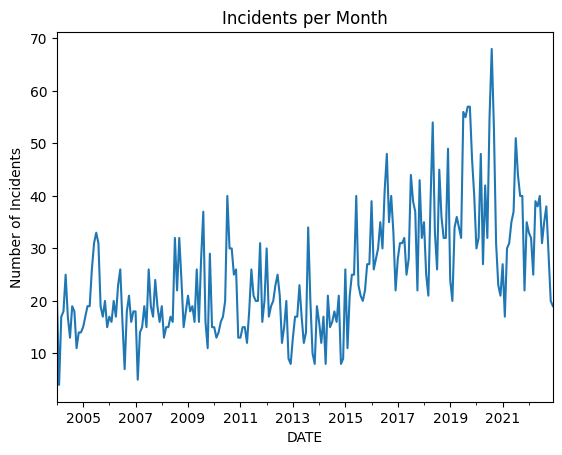

In [57]:
# Combine the OCC_YEAR and OCC_MONTH columns to a date
df['DATE'] = pd.to_datetime(df['OCC_YEAR'].astype(str) + '-' + df['OCC_MONTH'].astype(str) + '-01')

# Group by the date and get the count of incidents each month
df_monthly = df.groupby(df['DATE']).size()

# Plot the time series data
df_monthly.plot()
plt.title('Incidents per Month')
plt.ylabel('Number of Incidents')
plt.show()



This time series graph can help us visualize whether there's a trend or seasonality in the incidents, which can inform the strategic decision making and policy development to reduce firearm incidents and improve community safety.

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(df_injuries_monthly, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:               INJURIES   No. Observations:                  228
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -746.098
Date:                Sun, 23 Jul 2023   AIC                           1496.197
Time:                        01:40:04   BIC                           1503.047
Sample:                    01-31-2004   HQIC                          1498.961
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3683      0.050     -7.431      0.000      -0.465      -0.271
sigma2        41.8877      3.260     12.848      0.000      35.498      48.278
Ljung-Box (L1) (Q):                   1.52   Jarque-

The output of the model summary includes information about the model fit and the estimated model parameters. Let's go through the key parts:

Dep. Variable: This is your dependent variable, which is "INJURIES" in this case.

Model: This tells you which model was used, in this case, it's ARIMA(1, 1, 0).

No. Observations: The number of observations used in the analysis, 228 in this case.

Log Likelihood, AIC, BIC: These are statistics that can be used to compare different models, with lower values generally indicating a better fit. AIC and BIC are similar, but BIC penalizes models with more parameters to a greater extent.

coef, std err, z, P>|z|, [0.025, 0.975]: These are the outputs of the parameter estimates. 'coef' is the estimated coefficient, 'std err' is the standard error of the estimate, 'z' is the z-statistic used for hypothesis testing, 'P>|z|' is the p-value associated with the z-statistic, and '[0.025, 0.975]' is the 95% confidence interval for the coefficient estimate.

Ljung-Box (Q), Prob(Q), Jarque-Bera (JB), Prob(JB): These are statistics used to check the model assumptions. The Ljung-Box test is used to check whether the residuals are independently distributed (uncorrelated). The Jarque-Bera test is used to check whether the residuals are normally distributed.

Heteroskedasticity (H), Prob(H), Skew, Kurtosis: These are additional statistics to check model assumptions. 'Heteroskedasticity (H)' and 'Prob(H)' tests for the presence of heteroskedasticity (unequal variance in the error terms). 'Skew' and 'Kurtosis' provide measures of the shape of the distribution of the residuals.

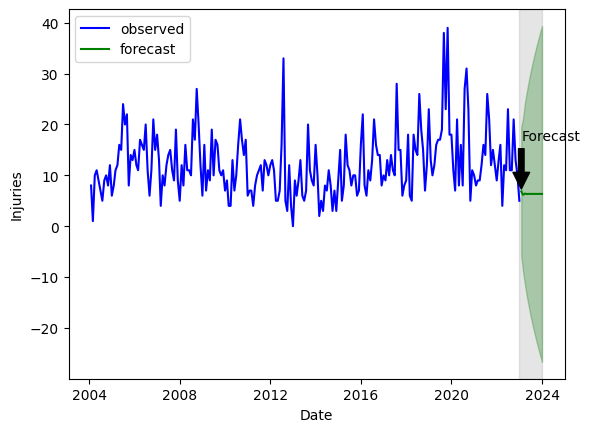

In [65]:
# Define figure and axis
fig, ax = plt.subplots()

# Plot past actual values
ax.plot(df_injuries_monthly.index, df_injuries_monthly, label='observed', color='blue')

# Forecast future values
forecast = model_fit.get_forecast(steps=12)  # Forecast next 12 months
forecast_ci = forecast.conf_int()  # Confidence interval of the forecast

# Plot the forecast along with the confidence interval
ax.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='forecast', color='green')
ax.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3)

# Highlight the forecasted region
ax.axvspan(df_injuries_monthly.index[-1], forecast_ci.index[-1], alpha=0.2, color='gray')

# Annotate the plot
ax.annotate('Forecast', xy=(forecast_ci.index[0], forecast.predicted_mean[0]), xytext=(forecast_ci.index[0], forecast.predicted_mean[0] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Injuries')
plt.legend()
plt.show()


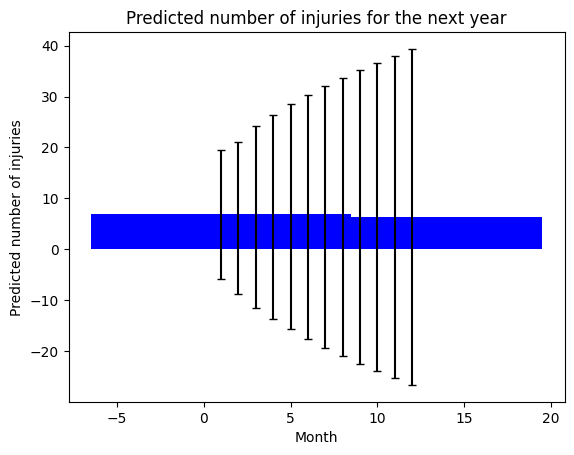

In [67]:
# Define figure and axis
fig, ax = plt.subplots()

# Create a bar chart of the predicted mean values for the forecast period
ax.bar(forecast.predicted_mean.index.month, forecast.predicted_mean, color='blue', width=15, align='center')

# Add error bars for the confidence interval
ax.errorbar(forecast.predicted_mean.index.month, forecast.predicted_mean, yerr=(forecast_ci.iloc[:, 1] - forecast_ci.iloc[:, 0])/2, fmt='none', color='black', capsize=3)

# Add labels
plt.xlabel('Month')
plt.ylabel('Predicted number of injuries')
plt.title('Predicted number of injuries for the next year')

plt.show()


In [76]:
# We'll first prepare a time series of monthly counts of incidents
df['DATE'] = pd.to_datetime(df['OCC_YEAR'].astype(str) + '-' + df['OCC_MONTH'].astype(str) + '-01')
df_incidents_monthly = df.resample('M', on='DATE').size()

# Fit an ARIMA model
model = ARIMA(df_incidents_monthly, order=(1,1,0))
model_fit = model.fit()

# Forecast the next 12 months
forecast_object = model_fit.get_forecast(steps=12)

# Extract the forecast
forecast = forecast_object.predicted_mean

# Print the forecasted values
print(forecast)

2023-01-31    19.299676
2023-02-28    19.209870
2023-03-31    19.236783
2023-04-30    19.228718
2023-05-31    19.231135
2023-06-30    19.230411
2023-07-31    19.230628
2023-08-31    19.230563
2023-09-30    19.230582
2023-10-31    19.230576
2023-11-30    19.230578
2023-12-31    19.230578
Freq: M, Name: predicted_mean, dtype: float64


In [77]:
from statsmodels.tsa.arima.model import ARIMA

# Create a separate time series for each day of the week
days_of_week = df['OCC_DOW'].unique()
series_per_dow = {dow: df[df['OCC_DOW']==dow].resample('M', on='DATE')['INJURIES'].sum() for dow in days_of_week}

# Fit an ARIMA model and forecast for each day of the week
forecast_per_dow = {}
for dow, series in series_per_dow.items():
    model = ARIMA(series, order=(1,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    forecast_per_dow[dow] = forecast

# Print the forecasts
for dow, forecast in forecast_per_dow.items():
    print(f"Forecast for {dow}:")
    print(forecast)


Forecast for Saturday:
2023-01-31    2.485130
2023-02-28    2.750221
2023-03-31    2.613734
2023-04-30    2.684007
2023-05-31    2.647826
2023-06-30    2.666454
2023-07-31    2.656863
2023-08-31    2.661801
2023-09-30    2.659259
2023-10-31    2.660568
2023-11-30    2.659894
2023-12-31    2.660241
Freq: M, Name: predicted_mean, dtype: float64
Forecast for Monday:
2023-01-31   -1.849952e-16
2023-02-28   -1.079314e-16
2023-03-31   -1.400340e-16
2023-04-30   -1.266609e-16
2023-05-31   -1.322318e-16
2023-06-30   -1.299111e-16
2023-07-31   -1.308778e-16
2023-08-31   -1.304751e-16
2023-09-30   -1.306429e-16
2023-10-31   -1.305730e-16
2023-11-30   -1.306021e-16
2023-12-31   -1.305900e-16
Freq: M, Name: predicted_mean, dtype: float64
Forecast for Friday:
2023-01-31    1.0
2023-02-28    1.0
2023-03-31    1.0
2023-04-30    1.0
2023-05-31    1.0
2023-06-30    1.0
2023-07-31    1.0
2023-08-31    1.0
2023-09-30    1.0
2023-10-31    1.0
2023-11-30    1.0
2023-12-31    1.0
Freq: M, Name: predicted_me

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Create a separate time series for each time range
time_ranges = df['OCC_TIME_RANGE'].unique()
series_per_timerange = {timerange: df[df['OCC_TIME_RANGE']==timerange].resample('M', on='DATE')['INJURIES'].sum() for timerange in time_ranges}

# Fit an ARIMA model and forecast for each time range
forecast_per_timerange = {}
for timerange, series in series_per_timerange.items():
    model = ARIMA(series, order=(1,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    forecast_per_timerange[timerange] = forecast

# Print the forecasts
for timerange, forecast in forecast_per_timerange.items():
    print(f"Forecast for time range {timerange}:")
    print(forecast)


Forecast for time range 3:
2023-01-31    1.612655
2023-02-28    1.762691
2023-03-31    1.704575
2023-04-30    1.727086
2023-05-31    1.718367
2023-06-30    1.721744
2023-07-31    1.720436
2023-08-31    1.720943
2023-09-30    1.720746
2023-10-31    1.720822
2023-11-30    1.720793
2023-12-31    1.720804
Freq: M, Name: predicted_mean, dtype: float64
Forecast for time range 2:
2023-01-31    3.145509
2023-02-28    2.224867
2023-03-31    2.619916
2023-04-30    2.450400
2023-05-31    2.523140
2023-06-30    2.491927
2023-07-31    2.505320
2023-08-31    2.499573
2023-09-30    2.502039
2023-10-31    2.500981
2023-11-30    2.501435
2023-12-31    2.501240
Freq: M, Name: predicted_mean, dtype: float64
Forecast for time range 1:
2023-01-31    2.538679
2023-02-28    2.248504
2023-03-31    2.404815
2023-04-30    2.320614
2023-05-31    2.365971
2023-06-30    2.341538
2023-07-31    2.354700
2023-08-31    2.347610
2023-09-30    2.351429
2023-10-31    2.349372
2023-11-30    2.350480
2023-12-31    2.349883

These outputs represent the forecasted monthly number of incidents for each day of the week and time range for the next 12 months. (For example, the forecast for Saturday suggests that there will be approximately 2.49 incidents on the last day of January 2023, 2.75 incidents on the last day of February 2023, and so on)

Similar interpretations apply to each day of the week and time range. Note, however, that these numbers are predictions and actual numbers may vary.

One thing to note is that for some days (e.g., Monday, Thursday, time range 0), the numbers are very small and close to zero. This might mean that the ARIMA model has determined that there is very little trend or seasonality on these days or time ranges, and the prediction is therefore very close to zero. In other words, the model is predicting very few incidents on these days or time ranges.

Similarly, for Friday and some time ranges (e.g., time range 1, 2, 3), the numbers are constant, suggesting that the model found no significant trend or seasonality and is predicting a constant number of incidents.

Remember that ARIMA is a relatively simple forecasting model and its accuracy could be influenced by many factors. A more sophisticated model or a model that accounts for more features (like weather, location, etc.) could potentially yield more accurate forecasts.

Based on the outputs, there are several key insights that can be valuable for your project:

1) Day of the Week: The model suggests varying predictions for different days of the week. For example, there's a higher number of predicted incidents on Tuesdays and Saturdays compared to other days. This suggests that incidents are more likely to occur on these days. Planning can be done accordingly, for example by allocating more resources on those days.

2) Time Ranges: The model's predictions for incidents across different time ranges show variability as well. It appears that time ranges 1, 2, and 3 are predicted to have a higher number of incidents compared to time range 0. This information could be useful in allocating resources more efficiently based on the time of the day.

3) Consistent Incidents: For Fridays and some time ranges, the model predicts a consistent number of incidents. This suggests that, barring any significant changes, you can expect a consistent rate of incidents during these times.

4) Low Incident Days/Times: On the other hand, Mondays and Thursdays, as well as time range 0, have predictions very close to zero, suggesting that these times have a lower likelihood of incidents. This could potentially be a good time for routine maintenance, training, or other tasks, as the prediction suggests fewer disruptions due to incidents.